## Predictive Analysis on Purchase Data

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pickle
from sklearn.linear_model import LogisticRegression 
import matplotlib.pyplot as plt
import matplotlib.axes as axs
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression

## Data Preparation

In [2]:
#load data
df_purchase = pd.read_csv('purchase data.csv')

# Import Scaler
scaler = pickle.load(open('scaler.pickle', 'rb'))
# Import PCA
pca = pickle.load(open('pca.pickle', 'rb'))
# Import K-Means
kmeans_pca = pickle.load(open('kmeans_pca.pickle', 'rb'))
# Standardization
features = df_purchase[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]
df_purchase_segm_std = scaler.transform(features)
# Apply PCA
df_purchase_segm_pca = pca.transform(df_purchase_segm_std)
# Segment data
purchase_segm_kmeans_pca = kmeans_pca.predict(df_purchase_segm_pca)

# Create a copy of the data frame
df_purchase_predictors = df_purchase.copy()
# Add segment labels
df_purchase_predictors['Segment'] = purchase_segm_kmeans_pca
segment_dummies = pd.get_dummies(purchase_segm_kmeans_pca, prefix = 'Segment', prefix_sep = '_')
df_purchase_predictors = pd.concat([df_purchase_predictors, segment_dummies], axis = 1)

df_pa = df_purchase_predictors

## Purchase Probability Model

In [3]:
Y = df_pa['Incidence']
Y

0        0
1        0
2        0
3        0
4        0
        ..
58688    0
58689    0
58690    0
58691    1
58692    0
Name: Incidence, Length: 58693, dtype: int64

In [4]:
X = pd.DataFrame()
X['Mean_Price'] = (df_pa['Price_1'] +
                   df_pa['Price_2'] +
                   df_pa['Price_3'] +
                   df_pa['Price_4'] +
                   df_pa['Price_5'] ) / 5

In [5]:
model_purchase = LogisticRegression(solver = 'sag')
model_purchase.fit(X,Y)

LogisticRegression(solver='sag')

In [6]:
# The coefficients for price. It is negative, signaling that with an increase in price, the purchase probability decreases.
model_purchase.coef_

array([[-2.34832003]])

## Price Elasticity of Purchase Probability

In [7]:
df_pa[['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']].describe()

,Price_1,Price_2,Price_3,Price_4,Price_5
count,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,1.392074,1.780999,2.006789,2.159945,2.654798
std,0.091139,0.170868,0.046867,0.089825,0.098272
min,1.100000,1.260000,1.870000,1.760000,2.110000
25%,1.340000,1.580000,1.970000,2.120000,2.630000
50%,1.390000,1.880000,2.010000,2.170000,2.670000
75%,1.470000,1.890000,2.060000,2.240000,2.700000
max,1.590000,1.900000,2.140000,2.260000,2.800000


In [8]:
# To get price range between (1.1 , 2.8)
price_range = np.arange(0.5, 3.5, 0.01)
price_range

array([0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 ,
       0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71,
       0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82,
       0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93,
       0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  , 1.01, 1.02, 1.03, 1.04,
       1.05, 1.06, 1.07, 1.08, 1.09, 1.1 , 1.11, 1.12, 1.13, 1.14, 1.15,
       1.16, 1.17, 1.18, 1.19, 1.2 , 1.21, 1.22, 1.23, 1.24, 1.25, 1.26,
       1.27, 1.28, 1.29, 1.3 , 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37,
       1.38, 1.39, 1.4 , 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48,
       1.49, 1.5 , 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59,
       1.6 , 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7 ,
       1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79, 1.8 , 1.81,
       1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.88, 1.89, 1.9 , 1.91, 1.92,
       1.93, 1.94, 1.95, 1.96, 1.97, 1.98, 1.99, 2.

In [9]:
df_price_range = pd.DataFrame(price_range)

In [10]:
Y_pr = model_purchase.predict_proba(df_price_range)
#Y_pr

/home/rover/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [11]:
purchase_pr = Y_pr[:][:, 1]
purchase_pr
# with increase in price , purchase probability decreases

array([0.91785857, 0.91607061, 0.91424737, 0.9123883 , 0.91049289,
       0.90856057, 0.90659082, 0.90458309, 0.90253685, 0.90045156,
       0.89832667, 0.89616166, 0.89395599, 0.89170913, 0.88942055,
       0.88708974, 0.88471616, 0.8822993 , 0.87983865, 0.87733372,
       0.874784  , 0.872189  , 0.86954825, 0.86686126, 0.86412757,
       0.86134673, 0.85851829, 0.85564183, 0.85271692, 0.84974315,
       0.84672013, 0.84364748, 0.84052484, 0.83735186, 0.83412821,
       0.83085357, 0.82752765, 0.82415017, 0.82072088, 0.81723955,
       0.81370596, 0.81011992, 0.80648127, 0.80278986, 0.79904559,
       0.79524836, 0.79139811, 0.78749481, 0.78353844, 0.77952904,
       0.77546665, 0.77135137, 0.76718331, 0.76296261, 0.75868947,
       0.75436409, 0.74998674, 0.74555768, 0.74107726, 0.73654581,
       0.73196375, 0.72733149, 0.72264952, 0.71791832, 0.71313846,
       0.70831051, 0.7034351 , 0.69851289, 0.69354456, 0.68853088,
       0.6834726 , 0.67837055, 0.67322557, 0.66803857, 0.66281

## Price elasticity:
1% change in output variable in response to a 1% change in input variable.

If value of 'Price elasticity' in absolute terms is less than 1 than it is 'inelastic'. Because, 1% change in price causes less than 1% change in purchase probability. Hence, increase in price will not cause significant decrease in purchase probability.

In [12]:
price_elasticities = model_purchase.coef_[:, 0] * price_range * (1 - purchase_pr)

In [13]:
df_price_elasticities = pd.DataFrame(price_range)

In [14]:
df_price_elasticities = df_price_elasticities.rename(columns = {0: "Price_Point"})
df_price_elasticities['Mean_PE'] = price_elasticities
df_price_elasticities

,Price_Point,Mean_PE
0,0.50,-0.096447
1,0.51,-0.100517
2,0.52,-0.104715
3,0.53,-0.109042
4,0.54,-0.113503
...,...,...
295,3.45,-8.013910
296,3.46,-8.039161
297,3.47,-8.064377
298,3.48,-8.089560


In [15]:
pd.options.display.max_rows = None
df_price_elasticities

,Price_Point,Mean_PE
0,0.50,-0.096447
1,0.51,-0.100517
2,0.52,-0.104715
3,0.53,-0.109042
4,0.54,-0.113503
5,0.55,-0.118101
6,0.56,-0.122839
7,0.57,-0.127720
8,0.58,-0.132747
9,0.59,-0.137925


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

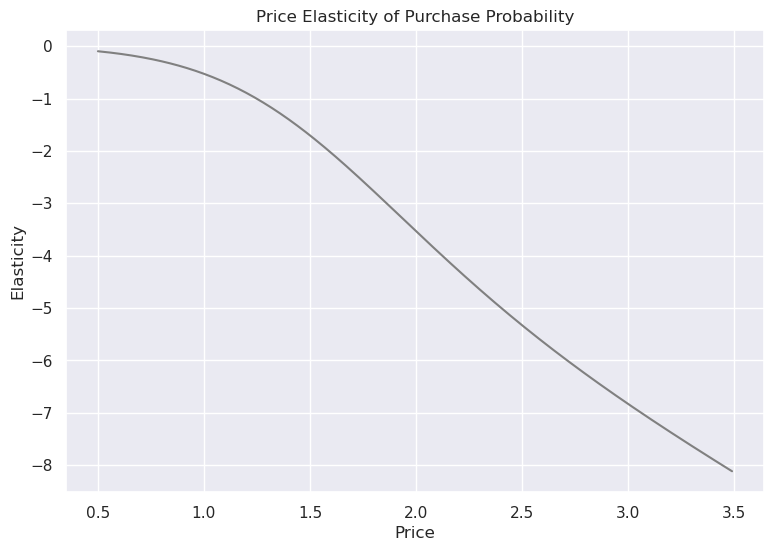

In [16]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elasticities, color = 'grey')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

For inelasticity we can increase price, for elasticity we need to decrease price to increase purchase.

Here, for price less than 1.25 we can increase price without much change in purchase probability and vice-versa.

## Purchase Probability by Segments

### $\color{green}{\text{Segment 1 - Fewer-Opportunities}}$

In [17]:
df_pa_segment_1 = df_pa[df_pa['Segment'] == 0]

In [18]:
Y = df_pa_segment_1['Incidence']

In [19]:
X = pd.DataFrame()

In [20]:
X['Mean_Price'] = (df_pa_segment_1['Price_1'] + 
                   df_pa_segment_1['Price_2'] + 
                   df_pa_segment_1['Price_3'] + 
                   df_pa_segment_1['Price_4'] + 
                   df_pa_segment_1['Price_5']) / 5

In [21]:
model_incidence_segment_1 = LogisticRegression(solver = 'sag')
model_incidence_segment_1.fit(X, Y)

LogisticRegression(solver='sag')

In [22]:
model_incidence_segment_1.coef_

array([[-3.63024813]])

In [23]:
Y_segment_1 = model_incidence_segment_1.predict_proba(df_price_range)
purchase_pr_segment_1 = Y_segment_1[:][:, 1]
pe_segment_1 = model_incidence_segment_1.coef_[:, 0] * price_range * (1 - purchase_pr_segment_1)

/home/rover/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [24]:
# Results

In [25]:
df_price_elasticities['PE_Segment_1'] = pe_segment_1

Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

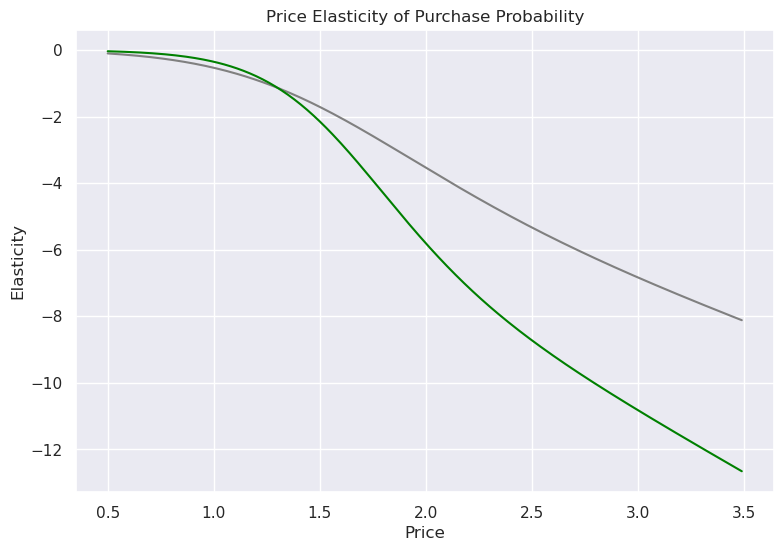

In [26]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elasticities, color = 'grey')
plt.plot(price_range, pe_segment_1, color = 'green')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

### $\color{red}{\text{Segment 2 - Standard}}$

In [27]:
df_pa_segment_2 = df_pa[df_pa['Segment'] == 1]

In [28]:
Y = df_pa_segment_2['Incidence']

X = pd.DataFrame()
X['Mean_Price'] = (df_pa_segment_2['Price_1'] + 
                   df_pa_segment_2['Price_2'] + 
                   df_pa_segment_2['Price_3'] + 
                   df_pa_segment_2['Price_4'] + 
                   df_pa_segment_2['Price_5']) / 5

model_incidence_segment2 = LogisticRegression(solver = 'sag')
model_incidence_segment2.fit(X, Y)

Y_segment_2 = model_incidence_segment2.predict_proba(df_price_range)
purchase_pr_segment2 = Y_segment_2[:][: , 1]
pe_segment2 = model_incidence_segment2.coef_[:,0] * price_range * ( 1- purchase_pr_segment2)

model_incidence_segment2.coef_

/home/rover/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[-1.50814672]])

In [111]:
# Results

# We observe that the price coefficient for the Standard is -1.5, whereas for the average customer it was -2.35.
# This is an indicator, that this segment is less price sensitive compared to the average customer.

In [30]:
df_price_elasticities['PE_Segment_2'] = pe_segment2

Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

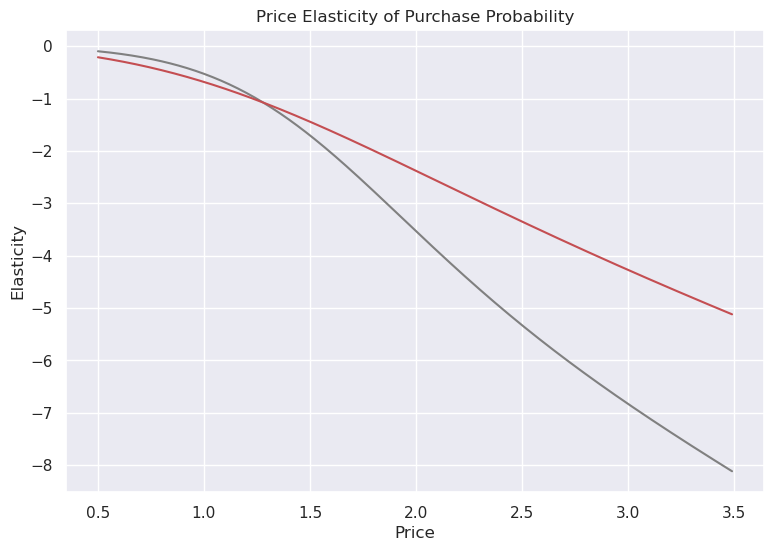

In [31]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elasticities, color = 'grey')
plt.plot(price_range, pe_segment2, color = 'r')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

### $\color{orange}{\text{Segment 3 - Carrier-Focused}}$

/home/rover/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[-1.71289075]])

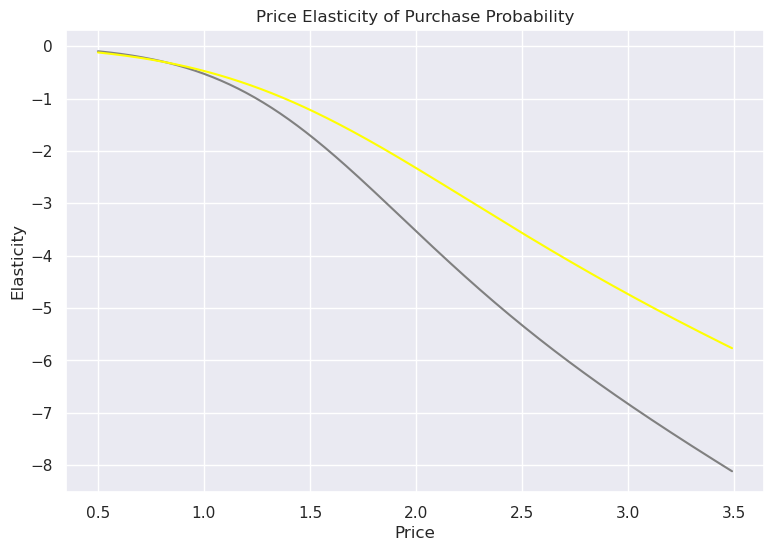

In [110]:
df_pa_segment_3 = df_pa[df_pa['Segment'] == 2]
Y = df_pa_segment_3['Incidence']

X = pd.DataFrame()
X['Mean_Price'] = (df_pa_segment_3['Price_1'] + 
                   df_pa_segment_3['Price_2'] + 
                   df_pa_segment_3['Price_3'] + 
                   df_pa_segment_3['Price_4'] + 
                   df_pa_segment_3['Price_5']) / 5

model_incidence_segment3 = LogisticRegression(solver = 'sag')
model_incidence_segment3.fit(X, Y)

Y_segment_3 = model_incidence_segment3.predict_proba(df_price_range)
purchase_pr_segment3 = Y_segment_3[:][: , 1]
pe_segment3 = model_incidence_segment3.coef_[:,0] * price_range *( 1- purchase_pr_segment3)

#Results
df_price_elasticities['PE_Segment_3'] = pe_segment3

plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elasticities, color = 'grey')
plt.plot(price_range, pe_segment3, color = 'yellow')

plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

model_incidence_segment3.coef_

### $\color{blue}{\text{Segment 4 - Well-Off}}$

/home/rover/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[-1.24573284]])

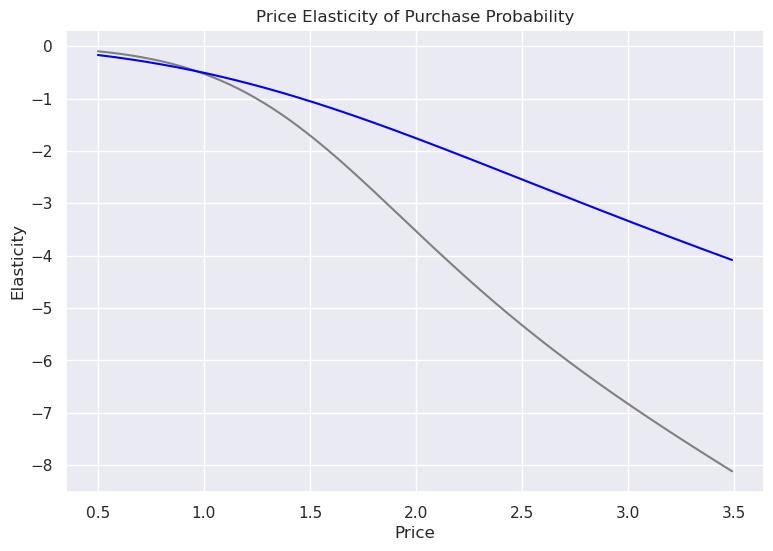

In [113]:
df_pa_segment_4 = df_pa[df_pa['Segment'] == 3]
Y = df_pa_segment_4['Incidence']

X = pd.DataFrame()
X['Mean_Price'] = (df_pa_segment_4['Price_1'] + 
                   df_pa_segment_4['Price_2'] + 
                   df_pa_segment_4['Price_3'] + 
                   df_pa_segment_4['Price_4'] + 
                   df_pa_segment_4['Price_5']) / 5

model_incidence_segment4 = LogisticRegression(solver = 'sag')
model_incidence_segment4.fit(X, Y)

model_incidence_segment4.coef_
Y_segment_4 = model_incidence_segment4.predict_proba(df_price_range)
purchase_pr_segment4 = Y_segment_4[:][: , 1]
pe_segment4 = model_incidence_segment4.coef_[:,0] * price_range *( 1- purchase_pr_segment4)

#Results
df_price_elasticities['PE_Segment_4'] = pe_segment4

plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elasticities, color = 'grey')
plt.plot(price_range, pe_segment4, color = 'blue')

plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

model_incidence_segment4.coef_

In [115]:
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_1,PE_Segment_2,PE_Segment_3,PE_Segment_4,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4,Brand 5 S0,Brand_5_Cross_Brand_4_S0,Brand 5 S1,Brand_5_Cross_Brand_4_S1,Brand 5 S2,Brand_5_Cross_Brand_4_S2,Brand 5 S3,Brand_5_Cross_Brand_4_S3,PE_Quantity_Promotion_1,PE_Quantity_Promotion_0
0,0.50,-0.096447,-0.030643,-0.211212,-0.119334,-0.167982,-0.125723,-0.195633,-0.049056,0.332012,-0.001041,0.181471,-0.115832,0.174107,-0.043940,0.194766,-0.297312,0.482421,-0.102157,-0.099543
1,0.51,-0.100517,-0.032391,-0.217783,-0.123526,-0.172905,-0.129838,-0.201753,-0.050617,0.337288,-0.001103,0.183766,-0.118871,0.176163,-0.045027,0.197250,-0.303358,0.491726,-0.104413,-0.101736
2,0.52,-0.104715,-0.034225,-0.224461,-0.127812,-0.177898,-0.134032,-0.207976,-0.052207,0.342507,-0.001168,0.186013,-0.121945,0.178167,-0.046123,0.199683,-0.309414,0.501015,-0.106679,-0.103939
3,0.53,-0.109042,-0.036148,-0.231249,-0.132193,-0.182963,-0.138307,-0.214302,-0.053827,0.347669,-0.001236,0.188211,-0.125054,0.180121,-0.047229,0.202065,-0.315481,0.510289,-0.108954,-0.106150
4,0.54,-0.113503,-0.038165,-0.238145,-0.136670,-0.188098,-0.142662,-0.220732,-0.055478,0.352773,-0.001308,0.190360,-0.128199,0.182024,-0.048343,0.204397,-0.321559,0.519548,-0.111238,-0.108369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,3.45,-8.013910,-12.508085,-5.051336,-5.685083,-4.021688,-4.860373,-4.982054,-3.231573,0.162234,-3.746073,0.023468,-3.592454,0.024055,-1.287420,0.068595,-3.337316,0.157472,-1.774292,-1.664290
296,3.46,-8.039161,-12.544921,-5.068190,-5.705240,-4.036555,-4.878572,-4.998957,-3.247767,0.160334,-3.757516,0.023008,-3.606359,0.023698,-1.297228,0.067972,-3.350646,0.152051,-1.788634,-1.677205
297,3.47,-8.064377,-12.581740,-5.085026,-5.725361,-4.051406,-4.896741,-5.015841,-3.263929,0.158448,-3.768938,0.022555,-3.620219,0.023347,-1.307092,0.067353,-3.363974,0.146794,-1.803124,-1.690246
298,3.48,-8.089560,-12.618542,-5.101844,-5.745446,-4.066241,-4.914879,-5.032704,-3.280058,0.156576,-3.780340,0.022109,-3.634035,0.022999,-1.317012,0.066739,-3.377298,0.141700,-1.817766,-1.703414


### ${\textbf{Results}}$

Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

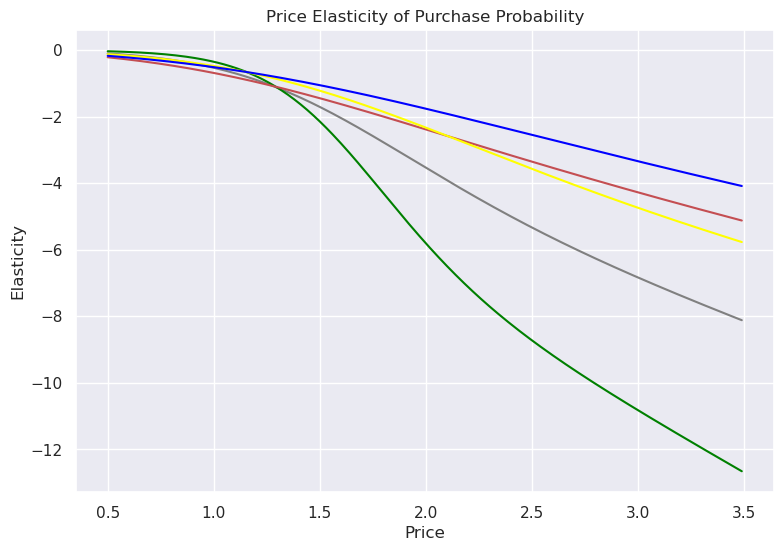

In [114]:
# We display all elasticities of purchase probability on the same plot. 
# We observe that the Well-off segment are the least elastic when compared to the rest. 
# So, their purchase probability elasticity is not as affected by price.
# The price elasticities for the Standard segment seem to differ across price range. This may be due to the fact that
# the standard segment is least homogenous, which we discovered during our descriptive analysis. 
# It may be that the customers in this segment have different shopping habbits, which is why their 
# customers start with being more elastic than average but then shift to being more inelastic than the average customer
# and indeed the Career-focused segment.
plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elasticities, color = 'grey')
plt.plot(price_range, pe_segment_1, color = 'green')
plt.plot(price_range, pe_segment2, color = 'r')
plt.plot(price_range, pe_segment3, color = 'yellow')
plt.plot(price_range, pe_segment4, color = 'blue')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

## Purchase Probability with Promotion Feature

### Data Preparation

In [35]:
Y = df_pa['Incidence']

In [36]:
X = pd.DataFrame()
X['Mean_Price'] = (df_pa['Price_1'] + 
                   df_pa['Price_2'] + 
                   df_pa['Price_3'] + 
                   df_pa['Price_4'] + 
                   df_pa['Price_5']) / 5

In [37]:
X['Promotion'] = (df_pa['Promotion_1'] +
                       df_pa['Promotion_2'] +
                       df_pa['Promotion_3'] +
                       df_pa['Promotion_4'] +
                       df_pa['Promotion_5'] ) / 5
X.head()

,Mean_Price,Promotion
0,2.044,0.2
1,2.028,0.0
2,2.028,0.0
3,2.028,0.0
4,2.030,0.0


## Model Estimation

In [38]:
# The coefficient for promotion is positive. 
# Therefore, there is a positive relationship between promotion and purchase probability.
model_incidence_promotion = LogisticRegression(solver = 'sag')
model_incidence_promotion.fit(X, Y)
model_incidence_promotion.coef_

array([[-1.49370776,  0.56156874]])

## Price Elasticity with Promotion

In [39]:
df_price_elasticity_promotion = pd.DataFrame(price_range)
df_price_elasticity_promotion = df_price_elasticity_promotion.rename(columns = {0: "Mean_Price"})

In [40]:
# We'll calculate price elasticities of purchase probability when we assume there is a promotion across at each price points.
df_price_elasticity_promotion['Promotion'] = 1


In [41]:
Y_promotion = model_incidence_promotion.predict_proba(df_price_elasticity_promotion)

In [42]:
promo = Y_promotion[:, 1]
price_elasticity_promo = (model_incidence_promotion.coef_[:, 0] * price_range) * (1 - promo)

In [118]:
df_price_elasticities['Elasticity_Promotion_1'] = price_elasticity_promo
pd.options.display.max_rows = None
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_1,PE_Segment_2,PE_Segment_3,PE_Segment_4,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4,Brand 5 S0,Brand_5_Cross_Brand_4_S0,Brand 5 S1,Brand_5_Cross_Brand_4_S1,Brand 5 S2,Brand_5_Cross_Brand_4_S2,Brand 5 S3,Brand_5_Cross_Brand_4_S3,PE_Quantity_Promotion_1,PE_Quantity_Promotion_0
0,0.50,-0.096447,-0.030643,-0.211212,-0.119334,-0.167982,-0.125723,-0.195633,-0.049056,0.332012,-0.001041,0.181471,-0.115832,0.174107,-0.043940,0.194766,-0.297312,0.482421,-0.102157,-0.099543
1,0.51,-0.100517,-0.032391,-0.217783,-0.123526,-0.172905,-0.129838,-0.201753,-0.050617,0.337288,-0.001103,0.183766,-0.118871,0.176163,-0.045027,0.197250,-0.303358,0.491726,-0.104413,-0.101736
2,0.52,-0.104715,-0.034225,-0.224461,-0.127812,-0.177898,-0.134032,-0.207976,-0.052207,0.342507,-0.001168,0.186013,-0.121945,0.178167,-0.046123,0.199683,-0.309414,0.501015,-0.106679,-0.103939
3,0.53,-0.109042,-0.036148,-0.231249,-0.132193,-0.182963,-0.138307,-0.214302,-0.053827,0.347669,-0.001236,0.188211,-0.125054,0.180121,-0.047229,0.202065,-0.315481,0.510289,-0.108954,-0.106150
4,0.54,-0.113503,-0.038165,-0.238145,-0.136670,-0.188098,-0.142662,-0.220732,-0.055478,0.352773,-0.001308,0.190360,-0.128199,0.182024,-0.048343,0.204397,-0.321559,0.519548,-0.111238,-0.108369
5,0.55,-0.118101,-0.040280,-0.245152,-0.141245,-0.193305,-0.147099,-0.227267,-0.057159,0.357820,-0.001384,0.192462,-0.131380,0.183877,-0.049468,0.206679,-0.327649,0.528790,-0.113532,-0.110598
6,0.56,-0.122839,-0.042497,-0.252269,-0.145920,-0.198585,-0.151619,-0.233908,-0.058871,0.362810,-0.001464,0.194515,-0.134597,0.185681,-0.050602,0.208912,-0.333750,0.538016,-0.115836,-0.112836
7,0.57,-0.127720,-0.044820,-0.259498,-0.150696,-0.203937,-0.156223,-0.240655,-0.060615,0.367741,-0.001548,0.196521,-0.137851,0.187435,-0.051745,0.211095,-0.339864,0.547226,-0.118148,-0.115083
8,0.58,-0.132747,-0.047255,-0.266839,-0.155574,-0.209362,-0.160911,-0.247510,-0.062391,0.372615,-0.001636,0.198480,-0.141143,0.189141,-0.052899,0.213229,-0.345990,0.556420,-0.120471,-0.117339
9,0.59,-0.137925,-0.049805,-0.274293,-0.160556,-0.214861,-0.165686,-0.254472,-0.064200,0.377430,-0.001729,0.200391,-0.144473,0.190797,-0.054062,0.215314,-0.352129,0.565597,-0.122803,-0.119604


## Price Elasticity without Promotion

In [44]:
df_price_elasticity_promotion_no = pd.DataFrame(price_range)
df_price_elasticity_promotion_no = df_price_elasticity_promotion_no.rename(columns = {0: "Mean_Price"})

In [45]:
# Promotion feature -No Promotion.
df_price_elasticity_promotion_no['Promotion'] = 0

In [46]:
Y_no_promo = model_incidence_promotion.predict_proba(df_price_elasticity_promotion_no)

In [47]:
no_promo = Y_no_promo[: , 1]

In [48]:
price_elasticity_no_promo = model_incidence_promotion.coef_[:, 0] * price_range *(1- no_promo)

In [49]:
df_price_elasticities['Elasticity_Promotion_0'] = price_elasticity_no_promo

Text(0.5, 1.0, 'Price Elasticity of Purchase Probability with and without Promotion')

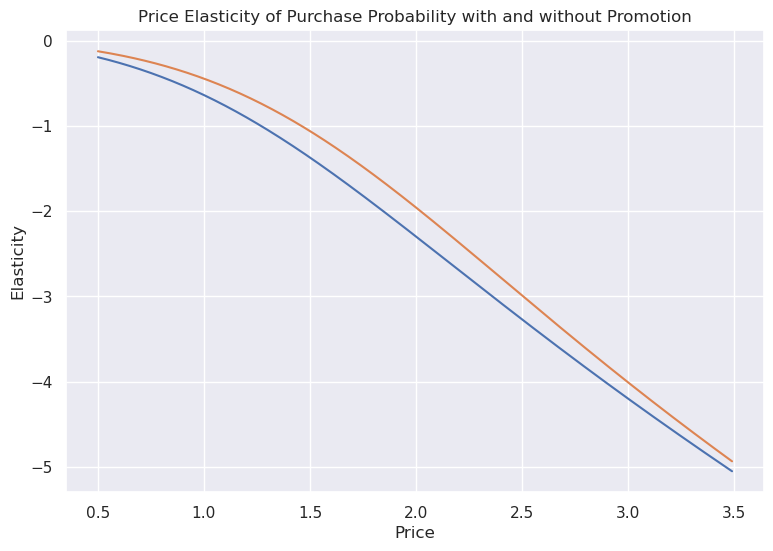

In [50]:
# Here we observe that the purchase probability elasticity of the customer is less elastic when there is promotion.
plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elasticity_no_promo)
plt.plot(price_range, price_elasticity_promo)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability with and without Promotion')

## ${\textbf{Brand Choice}}$

### Data Preparation

In [51]:
brand_choice = df_pa[df_pa['Incidence'] == 1]

In [52]:
pd.options.display.max_rows = 100
brand_choice

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,...,47,1,110866,1,0,0,True,False,False,False
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,...,47,1,110866,1,0,0,True,False,False,False
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,47,1,110866,1,0,0,True,False,False,False
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,...,47,1,110866,1,0,0,True,False,False,False
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,...,47,1,110866,1,0,0,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58621,200000500,296,1,2,6,0,0,1.48,1.89,2.01,...,42,1,120946,1,0,0,True,False,False,False
58648,200000500,460,1,1,12,0,0,1.35,1.57,2.02,...,42,1,120946,1,0,0,True,False,False,False
58674,200000500,641,1,2,7,0,0,1.50,1.85,2.06,...,42,1,120946,1,0,0,True,False,False,False
58687,200000500,697,1,2,6,0,0,1.42,1.51,1.97,...,42,1,120946,1,0,0,True,False,False,False


In [53]:
Y = brand_choice['Brand']

In [54]:
brand_choice.columns.values

array(['ID', 'Day', 'Incidence', 'Brand', 'Quantity', 'Last_Inc_Brand',
       'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3',
       'Promotion_4', 'Promotion_5', 'Sex', 'Marital status', 'Age',
       'Education', 'Income', 'Occupation', 'Settlement size', 'Segment',
       'Segment_0', 'Segment_1', 'Segment_2', 'Segment_3'], dtype=object)

In [55]:
# We predict based on the prices for the five brands.
features = ['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']
X = brand_choice[features]

In [56]:
model_brand_choice = LogisticRegression(solver = 'sag', multi_class = 'multinomial')
model_brand_choice.fit(X, Y)

LogisticRegression(multi_class='multinomial', solver='sag')

In [57]:
# Here are the coeffictients for the model. We have five brands and five features for the price. 
model_brand_choice.coef_

array([[-3.91597672,  0.65845104,  2.41764092,  0.70407252, -0.20213293],
       [ 1.27460481, -1.87985787, -0.21267005, -0.20634587,  0.58786466],
       [ 1.62423205,  0.56212717,  0.50104221,  1.03953491,  0.45283036],
       [ 0.57452782,  0.39558438, -1.40063779, -1.24624899,  0.24934308],
       [ 0.44261203,  0.26369528, -1.3053753 , -0.29101256, -1.08790517]])

In [58]:
bc_coef = pd.DataFrame(model_brand_choice.coef_)
bc_coef

,0,1,2,3,4
0,-3.915977,0.658451,2.417641,0.704073,-0.202133
1,1.274605,-1.879858,-0.212670,-0.206346,0.587865
2,1.624232,0.562127,0.501042,1.039535,0.452830
3,0.574528,0.395584,-1.400638,-1.246249,0.249343
4,0.442612,0.263695,-1.305375,-0.291013,-1.087905


In [59]:
# We transpose the data frame, to keep with the conventional representation of results.
bc_coef = pd.DataFrame(np.transpose(model_brand_choice.coef_))
coefficients = ['Coef_Brand_1', 'Coef_Brand_2', 'Coef_Brand_3', 'Coef_Brand_4', 'Coef_Brand_5']
bc_coef.columns = [coefficients]
prices = ['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)
bc_coef

,Coef_Brand_1,Coef_Brand_2,Coef_Brand_3,Coef_Brand_4,Coef_Brand_5
Price_1,-3.92,1.27,1.62,0.57,0.44
Price_2,0.66,-1.88,0.56,0.40,0.26
Price_3,2.42,-0.21,0.50,-1.40,-1.31
Price_4,0.70,-0.21,1.04,-1.25,-0.29
Price_5,-0.20,0.59,0.45,0.25,-1.09


## Own Price Elasticity Brand 5

In [60]:
# We want to calculate price elasticity of brand 5.
df_own_brand_5 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5['Price_1'] = brand_choice['Price_1'].mean()
df_own_brand_5['Price_2'] = brand_choice['Price_2'].mean()
df_own_brand_5['Price_3'] = brand_choice['Price_3'].mean()
df_own_brand_5['Price_4'] = brand_choice['Price_4'].mean()
df_own_brand_5['Price_5'] = price_range
df_own_brand_5

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.384559,1.764717,2.006694,2.159658,0.50
1,1.384559,1.764717,2.006694,2.159658,0.51
2,1.384559,1.764717,2.006694,2.159658,0.52
3,1.384559,1.764717,2.006694,2.159658,0.53
4,1.384559,1.764717,2.006694,2.159658,0.54
...,...,...,...,...,...
295,1.384559,1.764717,2.006694,2.159658,3.45
296,1.384559,1.764717,2.006694,2.159658,3.46
297,1.384559,1.764717,2.006694,2.159658,3.47
298,1.384559,1.764717,2.006694,2.159658,3.48


In [61]:
predict_brand_5 = model_brand_choice.predict_proba(df_own_brand_5)

In [62]:
# Since, we are interested in the probability for the fifth brand we need to obtain the last column located on position 4,
pr_own_brand_5 = predict_brand_5[: ][:, 4]

In [63]:
#the beta coefficient we require is that of the brand 5 coefficient and price 5.
beta5 = bc_coef.iloc[4, 4]
beta5

-1.09

In [64]:
# Calculating price elasticities for brand choice without promotion. 
own_price_elasticity_brand_5 = beta5 * price_range * (1 - pr_own_brand_5)

In [65]:
df_price_elasticities['Brand_5'] = own_price_elasticity_brand_5
pd.options.display.max_rows = None
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_1,PE_Segment_2,PE_Segment_3,PE_Segment_4,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5
0,0.50,-0.096447,-0.030643,-0.211212,-0.119096,-0.168044,-0.125723,-0.195633,-0.049056
1,0.51,-0.100517,-0.032391,-0.217783,-0.123279,-0.172968,-0.129838,-0.201753,-0.050617
2,0.52,-0.104715,-0.034225,-0.224461,-0.127555,-0.177963,-0.134032,-0.207976,-0.052207
3,0.53,-0.109042,-0.036148,-0.231249,-0.131926,-0.183028,-0.138307,-0.214302,-0.053827
4,0.54,-0.113503,-0.038165,-0.238145,-0.136393,-0.188164,-0.142662,-0.220732,-0.055478
5,0.55,-0.118101,-0.040280,-0.245152,-0.140958,-0.193372,-0.147099,-0.227267,-0.057159
6,0.56,-0.122839,-0.042497,-0.252269,-0.145622,-0.198653,-0.151619,-0.233908,-0.058871
7,0.57,-0.127720,-0.044820,-0.259498,-0.150387,-0.204006,-0.156223,-0.240655,-0.060615
8,0.58,-0.132747,-0.047255,-0.266839,-0.155253,-0.209432,-0.160911,-0.247510,-0.062391
9,0.59,-0.137925,-0.049805,-0.274293,-0.160224,-0.214932,-0.165686,-0.254472,-0.064200


Text(0.5, 1.0, 'Own Price Elasticity of Purchase Probability for Brand 5')

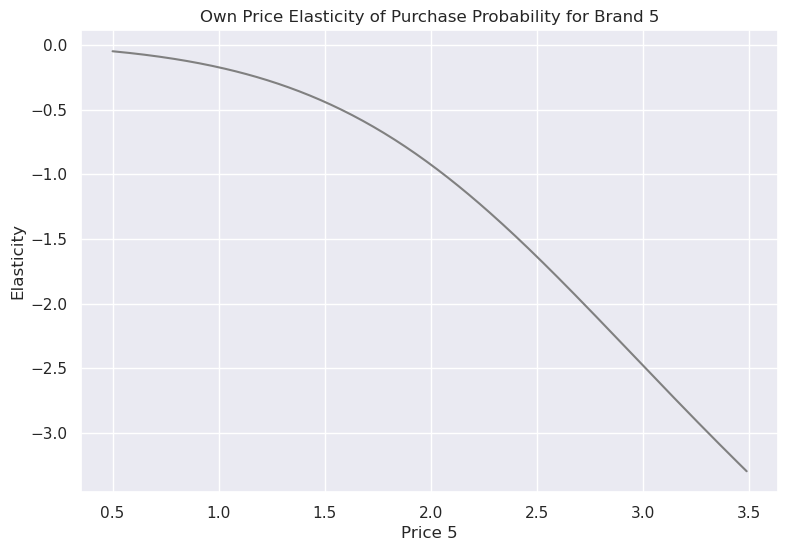

In [66]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, own_price_elasticity_brand_5, color = 'grey')
plt.xlabel('Price 5')
plt.ylabel('Elasticity')
plt.title('Own Price Elasticity of Purchase Probability for Brand 5')

## Cross Price Elasticity Brand 5, Cross Brand 4

In [67]:
# We want to examine the effect of the changes in price of a competitor brand.
# the brand which comes closest to our own brand is brand 4. 
df_brand5_cross_brand4 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4['Price_1'] = brand_choice['Price_1'].mean()
df_brand5_cross_brand4['Price_2'] = brand_choice['Price_2'].mean()
df_brand5_cross_brand4['Price_3'] = brand_choice['Price_3'].mean()
df_brand5_cross_brand4['Price_4'] = price_range
df_brand5_cross_brand4['Price_5'] = brand_choice['Price_5'].mean()

In [68]:
df_brand5_cross_brand4.head()

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.384559,1.764717,2.006694,0.50,2.654296
1,1.384559,1.764717,2.006694,0.51,2.654296
2,1.384559,1.764717,2.006694,0.52,2.654296
3,1.384559,1.764717,2.006694,0.53,2.654296
4,1.384559,1.764717,2.006694,0.54,2.654296


In [69]:
predict_brand5_cross_brand4 = model_brand_choice.predict_proba(df_brand5_cross_brand4)

In [70]:
# As now we're interested in what the probability of choosing the competitor brand is, 
# we need to select the purchase probability for brand 4, contained in the 4th column with index 3. 
pr_brand_4 = predict_brand5_cross_brand4[:][:, 3]

In [71]:
beta5

-1.09

In [72]:
brand5_cross_brand4_price_elasticity = -beta5 * price_range * pr_brand_4

In [73]:
df_price_elasticities['Brand_5_Cross_Brand_4'] = brand5_cross_brand4_price_elasticity
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_1,PE_Segment_2,PE_Segment_3,PE_Segment_4,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4
0,0.50,-0.096447,-0.030643,-0.211212,-0.119096,-0.168044,-0.125723,-0.195633,-0.049056,0.332012
1,0.51,-0.100517,-0.032391,-0.217783,-0.123279,-0.172968,-0.129838,-0.201753,-0.050617,0.337288
2,0.52,-0.104715,-0.034225,-0.224461,-0.127555,-0.177963,-0.134032,-0.207976,-0.052207,0.342507
3,0.53,-0.109042,-0.036148,-0.231249,-0.131926,-0.183028,-0.138307,-0.214302,-0.053827,0.347669
4,0.54,-0.113503,-0.038165,-0.238145,-0.136393,-0.188164,-0.142662,-0.220732,-0.055478,0.352773
5,0.55,-0.118101,-0.040280,-0.245152,-0.140958,-0.193372,-0.147099,-0.227267,-0.057159,0.357820
6,0.56,-0.122839,-0.042497,-0.252269,-0.145622,-0.198653,-0.151619,-0.233908,-0.058871,0.362810
7,0.57,-0.127720,-0.044820,-0.259498,-0.150387,-0.204006,-0.156223,-0.240655,-0.060615,0.367741
8,0.58,-0.132747,-0.047255,-0.266839,-0.155253,-0.209432,-0.160911,-0.247510,-0.062391,0.372615
9,0.59,-0.137925,-0.049805,-0.274293,-0.160224,-0.214932,-0.165686,-0.254472,-0.064200,0.377430


Text(0.5, 1.0, 'Cross Price Elasticity of Brand 5 wrt Brand 4')

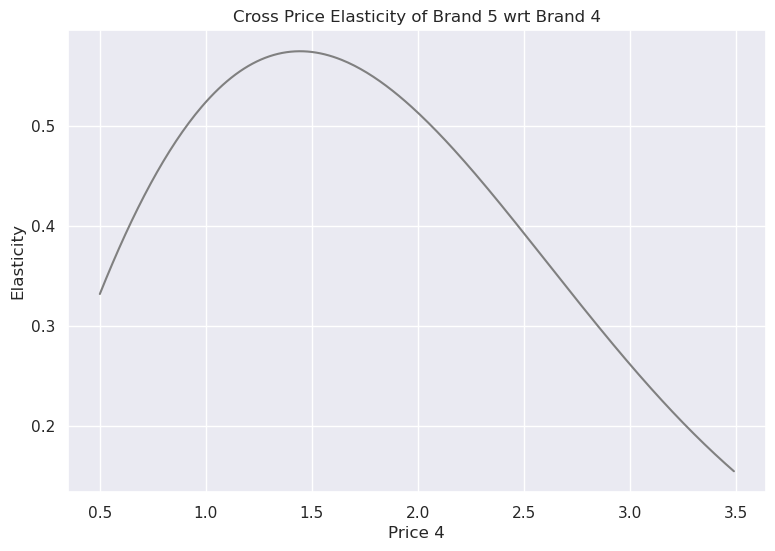

In [74]:
# Here we examine the cross price elasticity of purchase probability for brand 5 with respect to brand 4.
# We observe they are positive. As the price of the competitor brand increases, 
# so does the probability for purchasing our own brand.
# Even though the elasticity starts to decrease from the 1.45 mark, it is still positive, 
# signalling that the increase in purchase probability for the own brand happens more slowly.
plt.figure(figsize = (9, 6))
plt.plot(price_range, brand5_cross_brand4_price_elasticity, color = 'grey')
plt.xlabel('Price 4')
plt.ylabel('Elasticity')
plt.title('Cross Price Elasticity of Brand 5 wrt Brand 4')

## Own and Cross-Price Elasticity by Segment

### $\color{orange}{\text{Well-Off}}$

In [75]:
brand_choice_s3 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s3 = brand_choice_s3[brand_choice_s3['Segment'] == 3]

pd.options.display.max_rows = 100
brand_choice_s3

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
101,200000002,6,1,4,1,0,0,1.59,1.87,2.01,...,52,2,159052,2,1,3,False,False,False,True
115,200000002,100,1,4,2,0,0,1.47,1.90,1.95,...,52,2,159052,2,1,3,False,False,False,True
138,200000002,283,1,4,3,0,0,1.37,1.89,2.00,...,52,2,159052,2,1,3,False,False,False,True
141,200000002,307,1,4,1,0,0,1.34,1.89,2.01,...,52,2,159052,2,1,3,False,False,False,True
153,200000002,422,1,4,1,0,0,1.34,1.89,2.02,...,52,2,159052,2,1,3,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57346,200000489,687,1,4,1,4,1,1.50,1.87,2.06,...,44,2,193816,2,1,3,False,False,False,True
57347,200000489,693,1,4,2,4,1,1.42,1.51,2.02,...,44,2,193816,2,1,3,False,False,False,True
57348,200000489,701,1,4,3,4,1,1.42,1.85,1.99,...,44,2,193816,2,1,3,False,False,False,True
57350,200000489,715,1,4,2,0,0,1.50,1.80,2.09,...,44,2,193816,2,1,3,False,False,False,True


In [76]:
Y = brand_choice_s3['Brand']
brand_choice_s3 = pd.get_dummies(brand_choice_s3, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s3[features]
model_brand_choice_s3 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_s3.fit(X, Y)

bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s3.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)
bc_coef

,Coef_Brand_1,Coef_Brand_2,Coef_Brand_3,Coef_Brand_4,Coef_Brand_5
Price_1,-2.15,1.33,0.82,0.12,-0.11
Price_2,-0.96,-1.38,1.29,0.78,0.27
Price_3,2.01,-1.65,-0.49,0.03,0.11
Price_4,2.52,0.96,-0.25,-1.90,-1.33
Price_5,-0.99,-0.30,1.17,0.56,-0.44


### $\color{orange}{\text{Own-Brand Price Elasticity}}$

In [77]:
df_own_brand_5_s3 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s3['Price_1'] = brand_choice_s3['Price_1'].mean()
df_own_brand_5_s3['Price_2'] = brand_choice_s3['Price_2'].mean()
df_own_brand_5_s3['Price_3'] = brand_choice_s3['Price_3'].mean()
df_own_brand_5_s3['Price_4'] = brand_choice_s3['Price_4'].mean()
df_own_brand_5_s3['Price_5'] = price_range

predict_own_brand_5_s3 = model_brand_choice_s3.predict_proba(df_own_brand_5_s3)
pr_own_brand_5_s3 = predict_own_brand_5_s3[: ][: , 4]

own_price_elasticity_brand_5_s3 =  beta5 * price_range * (1 - pr_own_brand_5_s3)
df_price_elasticities['Brand 5 S3'] = own_price_elasticity_brand_5_s3

### $\color{orange}{\text{Cross-Brand Price Elasticity}}$

In [78]:
df_brand5_cross_brand4_s3 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s3['Price_1'] = brand_choice_s3['Price_1'].mean()
df_brand5_cross_brand4_s3['Price_2'] = brand_choice_s3['Price_2'].mean()
df_brand5_cross_brand4_s3['Price_3'] = brand_choice_s3['Price_3'].mean()
df_brand5_cross_brand4_s3['Price_4'] = price_range
df_brand5_cross_brand4_s3['Price_5'] = brand_choice_s3['Price_5'].mean()

predict_brand5_cross_brand4_s3 = model_brand_choice_s3.predict_proba(df_brand5_cross_brand4_s3)
pr_cross_brand_5_s3 = predict_brand5_cross_brand4_s3[: ][: , 3]

brand5_cross_brand4_price_elasticity_s3 = -beta5 * price_range * pr_cross_brand_5_s3
df_price_elasticities['Brand_5_Cross_Brand_4_S3'] = brand5_cross_brand4_price_elasticity_s3
pd.options.display.max_rows = None
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_1,PE_Segment_2,PE_Segment_3,PE_Segment_4,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4,Brand 5 S3,Brand_5_Cross_Brand_4_S3
0,0.50,-0.096447,-0.030643,-0.211212,-0.119096,-0.168044,-0.125723,-0.195633,-0.049056,0.332012,-0.297312,0.482421
1,0.51,-0.100517,-0.032391,-0.217783,-0.123279,-0.172968,-0.129838,-0.201753,-0.050617,0.337288,-0.303358,0.491726
2,0.52,-0.104715,-0.034225,-0.224461,-0.127555,-0.177963,-0.134032,-0.207976,-0.052207,0.342507,-0.309414,0.501015
3,0.53,-0.109042,-0.036148,-0.231249,-0.131926,-0.183028,-0.138307,-0.214302,-0.053827,0.347669,-0.315481,0.510289
4,0.54,-0.113503,-0.038165,-0.238145,-0.136393,-0.188164,-0.142662,-0.220732,-0.055478,0.352773,-0.321559,0.519548
5,0.55,-0.118101,-0.040280,-0.245152,-0.140958,-0.193372,-0.147099,-0.227267,-0.057159,0.357820,-0.327649,0.528790
6,0.56,-0.122839,-0.042497,-0.252269,-0.145622,-0.198653,-0.151619,-0.233908,-0.058871,0.362810,-0.333750,0.538016
7,0.57,-0.127720,-0.044820,-0.259498,-0.150387,-0.204006,-0.156223,-0.240655,-0.060615,0.367741,-0.339864,0.547226
8,0.58,-0.132747,-0.047255,-0.266839,-0.155253,-0.209432,-0.160911,-0.247510,-0.062391,0.372615,-0.345990,0.556420
9,0.59,-0.137925,-0.049805,-0.274293,-0.160224,-0.214932,-0.165686,-0.254472,-0.064200,0.377430,-0.352129,0.565597


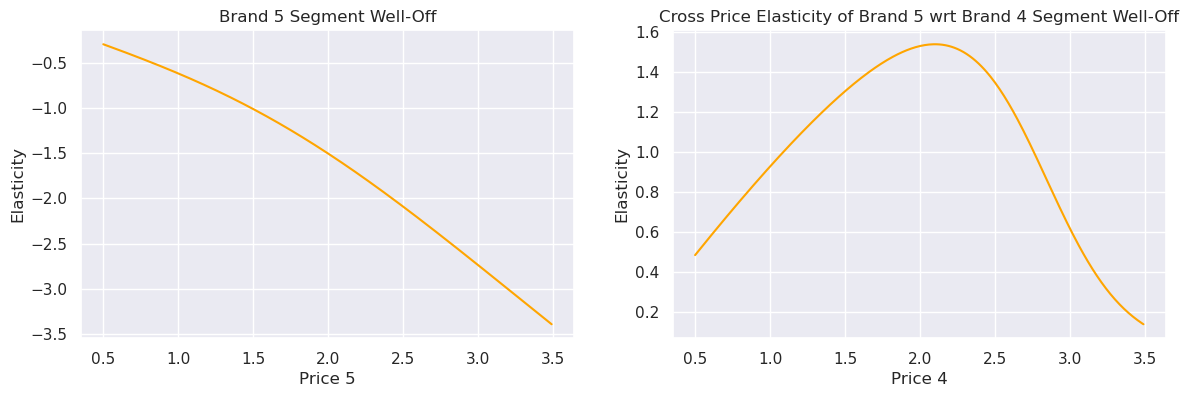

In [79]:
# Using a figure with axes we plot the own brand and cross-brand price elasticities for brand 5 cross brand 4 side by side.
fig, axs = plt.subplots(1, 2, figsize = (14, 4))
axs[0].plot(price_range, own_price_elasticity_brand_5_s3, color = 'orange')
axs[0].set_title('Brand 5 Segment Well-Off')
axs[0].set_xlabel('Price 5')

axs[1].plot(price_range, brand5_cross_brand4_price_elasticity_s3, color = 'orange')
axs[1].set_title('Cross Price Elasticity of Brand 5 wrt Brand 4 Segment Well-Off')
axs[1].set_xlabel('Price 4')

for ax in axs.flat:
    ax.set(ylabel = 'Elasticity')

### $\color{blue}{\text{Standard}}$

In [80]:
brand_choice_s0 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s0 = brand_choice_s0[brand_choice_s0['Segment'] == 1]
brand_choice_s0.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,...,47,1,110866,1,0,0,True,False,False,False
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,...,47,1,110866,1,0,0,True,False,False,False
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,47,1,110866,1,0,0,True,False,False,False
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,...,47,1,110866,1,0,0,True,False,False,False
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,...,47,1,110866,1,0,0,True,False,False,False


In [81]:
Y = brand_choice_s0['Brand']
brand_choice_s0 = pd.get_dummies(brand_choice_s0, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s0[features]
model_brand_choice_s0 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 200)
model_brand_choice_s0.fit(X, Y)

bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s0.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)

/home/rover/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### $\color{blue}{\text{Own-Brand Price Elasticity}}$

In [82]:
# Calculating own-brand price elasticity for brand 5 and the Standard segment.
df_own_brand_5_s0 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s0['Price_1'] = brand_choice_s0['Price_1'].mean()
df_own_brand_5_s0['Price_2'] = brand_choice_s0['Price_2'].mean()
df_own_brand_5_s0['Price_3'] = brand_choice_s0['Price_3'].mean()
df_own_brand_5_s0['Price_4'] = brand_choice_s0['Price_4'].mean()
df_own_brand_5_s0['Price_5'] = price_range

predict_own_brand_5_s0 = model_brand_choice_s0.predict_proba(df_own_brand_5_s0)
pr_own_brand_5_s0 = predict_own_brand_5_s0[: ][: , 4]

# Compute price elasticities and update master data frame.
# We'd like to include the elasticities for the segments in order from 0 to three, which is why we use insert() on position 10.
own_price_elasticity_brand_5_s0 =  beta5 * price_range * (1 - pr_own_brand_5_s0)
df_price_elasticities.insert(10, column = 'Brand 5 S0', value = own_price_elasticity_brand_5_s0)

### $\color{blue}{\text{Cross-Brand Price Elasticity}}$

In [83]:
# Calculating cross-brand price elasticity for brand 5 with respect to brand 4 for the Standard segment.
df_brand5_cross_brand4_s0 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s0['Price_1'] = brand_choice_s0['Price_1'].mean()
df_brand5_cross_brand4_s0['Price_2'] = brand_choice_s0['Price_2'].mean()
df_brand5_cross_brand4_s0['Price_3'] = brand_choice_s0['Price_3'].mean()
df_brand5_cross_brand4_s0['Price_4'] = price_range
df_brand5_cross_brand4_s0['Price_5'] = brand_choice_s0['Price_5'].mean()

predict_brand5_cross_brand4_s0 = model_brand_choice_s0.predict_proba(df_brand5_cross_brand4_s0)
pr_cross_brand_5_s0 = predict_brand5_cross_brand4_s0[: ][: , 3]

# Compute price elasticities and update master data frame.
# We need to use insert() on position 11, to save the price elasticities in the correct order.
brand5_cross_brand4_price_elasticity_s0 = -beta5 * price_range * pr_cross_brand_5_s0
df_price_elasticities.insert(11, column = 'Brand_5_Cross_Brand_4_S0', value = brand5_cross_brand4_price_elasticity_s0)

### $\color{green}{\text{Career-Focused}}$

In [84]:
# Filter data by the Career-focused segment, which is the first segment.
brand_choice_s1 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s1 = brand_choice_s1[brand_choice_s1['Segment'] == 2]

In [85]:
# Brand Choice Model estimation.
Y = brand_choice_s1['Brand']
brand_choice_s1 = pd.get_dummies(brand_choice_s1, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s1[features]
model_brand_choice_s1 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_s1.fit(X, Y)

# Coefficients table segment 1
bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s1.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)

### $\color{green}{\text{Own-Brand Price Elasticity}}$

In [86]:
# Calculating own-brand price elasticity for brand 5 and the Career-focused segment.
df_own_brand_5_s1 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s1['Price_1'] = brand_choice_s1['Price_1'].mean()
df_own_brand_5_s1['Price_2'] = brand_choice_s1['Price_2'].mean()
df_own_brand_5_s1['Price_3'] = brand_choice_s1['Price_3'].mean()
df_own_brand_5_s1['Price_4'] = brand_choice_s1['Price_4'].mean()
df_own_brand_5_s1['Price_5'] = price_range

predict_own_brand_5_s1 = model_brand_choice_s1.predict_proba(df_own_brand_5_s1)
pr_own_brand_5_s1 = predict_own_brand_5_s1[: ][: , 4]

#compute price elasticities and update data frame
own_price_elasticity_brand_5_s1 =  beta5 * price_range * (1 - pr_own_brand_5_s1)
df_price_elasticities.insert(12, column = 'Brand 5 S1', value = own_price_elasticity_brand_5_s1)

### $\color{green}{\text{Cross-Brand Price Elasticity}}$

In [87]:
# Calculating cross-brand price elasticity for brand 5 with respect to brand 4 for the Career-focused segment.
df_brand5_cross_brand4_s1 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s1['Price_1'] = brand_choice_s1['Price_1'].mean()
df_brand5_cross_brand4_s1['Price_2'] = brand_choice_s1['Price_2'].mean()
df_brand5_cross_brand4_s1['Price_3'] = brand_choice_s1['Price_3'].mean()
df_brand5_cross_brand4_s1['Price_4'] = price_range
df_brand5_cross_brand4_s1['Price_5'] = brand_choice_s1['Price_5'].mean()

predict_brand5_cross_brand4_s1 = model_brand_choice_s1.predict_proba(df_brand5_cross_brand4_s1)
pr_cross_brand_5_s1 = predict_brand5_cross_brand4_s1[: ][: , 3]

brand5_cross_brand4_price_elasticity_s1 = -beta5 * price_range * pr_cross_brand_5_s1
df_price_elasticities.insert(13, column = 'Brand_5_Cross_Brand_4_S1', value = brand5_cross_brand4_price_elasticity_s1)

### $\color{red}{\text{Fewer-Opportunities}}$

In [88]:
# Filter data, select only purchases from segment 2, which is the Fewer-Opportunities segment.
brand_choice_s2 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s2 = brand_choice_s2[brand_choice_s2['Segment'] == 0]

In [89]:
# Brand Choice Model estimation.
Y = brand_choice_s2['Brand']
brand_choice_s2 = pd.get_dummies(brand_choice_s2, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s2[features]
model_brand_choice_s2 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_s2.fit(X, Y)

# Coefficients table segment 2
bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s2.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)

### $\color{red}{\text{Own-Brand Price Elasticity}}$

In [90]:
# Calculating own-brand price elasticity for brand 5 and the Fewer-opportunities segment.
df_own_brand_5_s2 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s2['Price_1'] = brand_choice_s2['Price_1'].mean()
df_own_brand_5_s2['Price_2'] = brand_choice_s2['Price_2'].mean()
df_own_brand_5_s2['Price_3'] = brand_choice_s2['Price_3'].mean()
df_own_brand_5_s2['Price_4'] = brand_choice_s2['Price_4'].mean()
df_own_brand_5_s2['Price_5'] = price_range

predict_own_brand_5_s2 = model_brand_choice_s2.predict_proba(df_own_brand_5_s2)
pr_own_brand_5_s2 = predict_own_brand_5_s2[: ][: , 4]

#compute price elasticities and update data frame
own_price_elasticity_brand_5_s2 =  beta5 * price_range * (1 - pr_own_brand_5_s2)
df_price_elasticities.insert(14, column = 'Brand 5 S2', value = own_price_elasticity_brand_5_s2)

### $\color{red}{\text{Cross-Brand Price Elasticity}}$

In [91]:
# Calculating cross-brand price elasticity for brand 5 with respect to brand 4 for the Fewer-opportunities segment.
df_brand5_cross_brand4_s2 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s2['Price_1'] = brand_choice_s2['Price_1'].mean()
df_brand5_cross_brand4_s2['Price_2'] = brand_choice_s2['Price_2'].mean()
df_brand5_cross_brand4_s2['Price_3'] = brand_choice_s2['Price_3'].mean()
df_brand5_cross_brand4_s2['Price_4'] = price_range
df_brand5_cross_brand4_s2['Price_5'] = brand_choice_s2['Price_5'].mean()

predict_brand5_cross_brand4_s2 = model_brand_choice_s2.predict_proba(df_brand5_cross_brand4_s2)
pr_cross_brand_5_s2 = predict_brand5_cross_brand4_s2[: ][: , 3]

brand5_cross_brand4_price_elasticity_s2 = -beta5 * price_range * pr_cross_brand_5_s2
df_price_elasticities.insert(15, column = 'Brand_5_Cross_Brand_4_S2', value = brand5_cross_brand4_price_elasticity_s2)
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_1,PE_Segment_2,PE_Segment_3,PE_Segment_4,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4,Brand 5 S0,Brand_5_Cross_Brand_4_S0,Brand 5 S1,Brand_5_Cross_Brand_4_S1,Brand 5 S2,Brand_5_Cross_Brand_4_S2,Brand 5 S3,Brand_5_Cross_Brand_4_S3
0,0.50,-0.096447,-0.030643,-0.211212,-0.119096,-0.168044,-0.125723,-0.195633,-0.049056,0.332012,-0.001041,0.181471,-0.115832,0.174107,-0.043940,0.194766,-0.297312,0.482421
1,0.51,-0.100517,-0.032391,-0.217783,-0.123279,-0.172968,-0.129838,-0.201753,-0.050617,0.337288,-0.001103,0.183766,-0.118871,0.176163,-0.045027,0.197250,-0.303358,0.491726
2,0.52,-0.104715,-0.034225,-0.224461,-0.127555,-0.177963,-0.134032,-0.207976,-0.052207,0.342507,-0.001168,0.186013,-0.121945,0.178167,-0.046123,0.199683,-0.309414,0.501015
3,0.53,-0.109042,-0.036148,-0.231249,-0.131926,-0.183028,-0.138307,-0.214302,-0.053827,0.347669,-0.001236,0.188211,-0.125054,0.180121,-0.047229,0.202065,-0.315481,0.510289
4,0.54,-0.113503,-0.038165,-0.238145,-0.136393,-0.188164,-0.142662,-0.220732,-0.055478,0.352773,-0.001308,0.190360,-0.128199,0.182024,-0.048343,0.204397,-0.321559,0.519548
5,0.55,-0.118101,-0.040280,-0.245152,-0.140958,-0.193372,-0.147099,-0.227267,-0.057159,0.357820,-0.001384,0.192462,-0.131380,0.183877,-0.049468,0.206679,-0.327649,0.528790
6,0.56,-0.122839,-0.042497,-0.252269,-0.145622,-0.198653,-0.151619,-0.233908,-0.058871,0.362810,-0.001464,0.194515,-0.134597,0.185681,-0.050602,0.208912,-0.333750,0.538016
7,0.57,-0.127720,-0.044820,-0.259498,-0.150387,-0.204006,-0.156223,-0.240655,-0.060615,0.367741,-0.001548,0.196521,-0.137851,0.187435,-0.051745,0.211095,-0.339864,0.547226
8,0.58,-0.132747,-0.047255,-0.266839,-0.155253,-0.209432,-0.160911,-0.247510,-0.062391,0.372615,-0.001636,0.198480,-0.141143,0.189141,-0.052899,0.213229,-0.345990,0.556420
9,0.59,-0.137925,-0.049805,-0.274293,-0.160224,-0.214932,-0.165686,-0.254472,-0.064200,0.377430,-0.001729,0.200391,-0.144473,0.190797,-0.054062,0.215314,-0.352129,0.565597


Text(0.5, 0, 'Price 4')

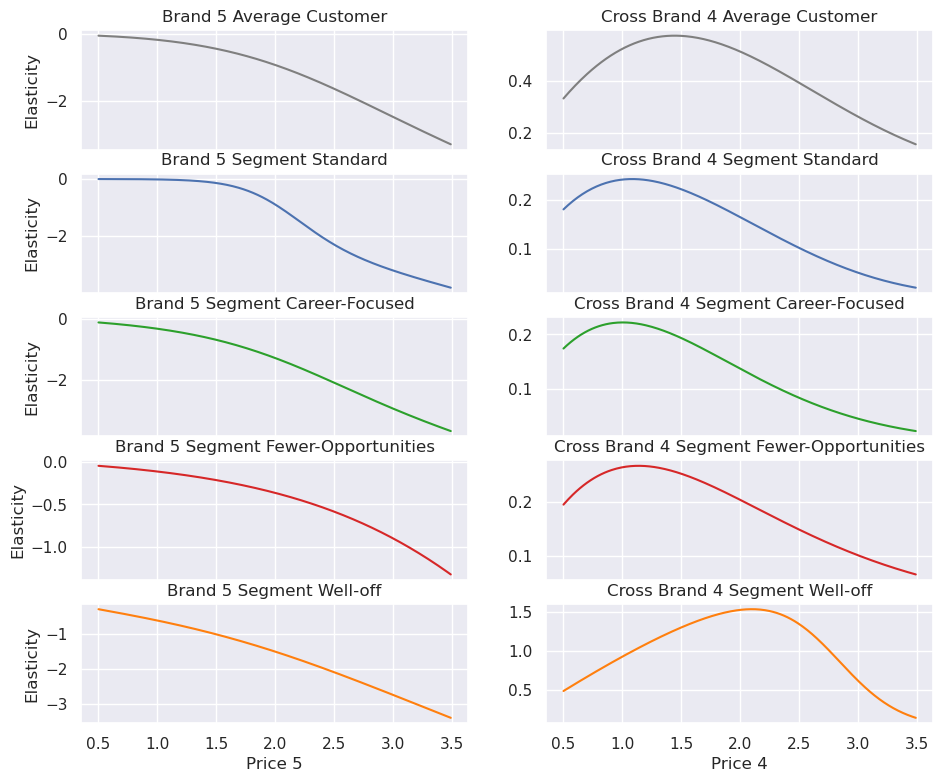

In [92]:
# We plot the own and cross brand price elasticities for the average customer and each of the four segments.
# We can observe differences and similiraties between the segments and examine their preference, when it comes to brand choice.
# The two segments, which seem to be of most interested for the marketing team of brand 5, seem to be the Career-focused
# and the Well-off. They are also the segments which purchase this brand most often. 
# The Career-focused segment is the most inelastic and they are the most loyal segment. 
# Based on our model, they do not seem to be that affected by price, therefore brand 5 could increase its price, 
# without fear of significant loss of customers from this segment. 
# The Well-off segment on the other hand, seems to be more elastic. They also purchase the competitor brand 4 most often.
# In order to target this segment, our analysis signals, that price needs to be decreased. However, keep in mind 
# that other factors aside from price might be influencing the purchase behaivour of this segment.
fig1, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 2, figsize = (11, 9), sharex = True)
ax1[0].plot(price_range, own_price_elasticity_brand_5, 'tab:grey')
ax1[0].set_title('Brand 5 Average Customer')
ax1[0].set_ylabel('Elasticity')
ax1[1].plot(price_range, brand5_cross_brand4_price_elasticity, 'tab:grey')
ax1[1].set_title('Cross Brand 4 Average Customer')


ax2[0].plot(price_range, own_price_elasticity_brand_5_s0)
ax2[0].set_title('Brand 5 Segment Standard')
ax2[0].set_ylabel('Elasticity')
ax2[1].plot(price_range, brand5_cross_brand4_price_elasticity_s0)
ax2[1].set_title('Cross Brand 4 Segment Standard')

ax3[0].plot(price_range, own_price_elasticity_brand_5_s1, 'tab:green')
ax3[0].set_title('Brand 5 Segment Career-Focused')
ax3[0].set_ylabel('Elasticity')
ax3[1].plot(price_range, brand5_cross_brand4_price_elasticity_s1, 'tab:green')
ax3[1].set_title('Cross Brand 4 Segment Career-Focused')

ax4[0].plot(price_range, own_price_elasticity_brand_5_s2, 'tab:red')
ax4[0].set_title('Brand 5 Segment Fewer-Opportunities')
ax4[0].set_ylabel('Elasticity')
ax4[1].plot(price_range, brand5_cross_brand4_price_elasticity_s2, 'tab:red')
ax4[1].set_title('Cross Brand 4 Segment Fewer-Opportunities')

ax5[0].plot(price_range, own_price_elasticity_brand_5_s3, 'tab:orange')
ax5[0].set_title('Brand 5 Segment Well-off')
ax5[0].set_xlabel('Price 5')
ax5[0].set_ylabel('Elasticity')
ax5[1].plot(price_range, brand5_cross_brand4_price_elasticity_s3, 'tab:orange')
ax5[1].set_title('Cross Brand 4 Segment Well-off')
ax5[1].set_xlabel('Price 4')

## Price Elasticity of Purchase Quantity

In [93]:
df_purchase_quantity = df_pa[df_pa['Incidence'] == 1]
df_purchase_quantity.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,...,47,1,110866,1,0,0,True,False,False,False
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,...,47,1,110866,1,0,0,True,False,False,False
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,47,1,110866,1,0,0,True,False,False,False
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,...,47,1,110866,1,0,0,True,False,False,False
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,...,47,1,110866,1,0,0,True,False,False,False


In [94]:
df_purchase_quantity = pd.get_dummies(df_purchase_quantity, columns = ['Brand'], prefix = 'Brand', prefix_sep = '_')
# The descriptive analysis of the purchase quantitiy data frame, shows that quantity ranges from 1 to 15 
# and has an average value of 2.8, which means that more often than not our customers buy more than 1 chocolate candy bar.
df_purchase_quantity.describe()

,ID,Day,Incidence,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
count,1.463800e+04,14638.000000,14638.0,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,...,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000
mean,2.000003e+08,359.607597,1.0,2.774559,1.535251,0.406955,1.384559,1.764717,2.006694,2.159658,...,0.128091,0.045430,0.357289,0.385162,40.346905,1.151045,126706.452043,0.845471,0.797513,1.468780
std,1.423786e+02,205.346253,0.0,1.796736,2.060858,0.491283,0.090944,0.181667,0.046200,0.093253,...,0.334203,0.208252,0.479217,0.486650,12.346284,0.634625,39935.109358,0.633840,0.810358,1.140209
min,2.000000e+08,1.000000,1.0,1.000000,0.000000,0.000000,1.100000,1.260000,1.870000,1.760000,...,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,38247.000000,0.000000,0.000000,0.000000
25%,2.000001e+08,175.000000,1.0,2.000000,0.000000,0.000000,1.340000,1.570000,1.970000,2.120000,...,0.000000,0.000000,0.000000,0.000000,31.000000,1.000000,102723.000000,0.000000,0.000000,0.000000
50%,2.000003e+08,355.000000,1.0,2.000000,0.000000,0.000000,1.390000,1.880000,2.010000,2.180000,...,0.000000,0.000000,0.000000,0.000000,37.000000,1.000000,122895.000000,1.000000,1.000000,2.000000
75%,2.000004e+08,532.000000,1.0,3.000000,4.000000,1.000000,1.470000,1.890000,2.060000,2.240000,...,0.000000,0.000000,1.000000,1.000000,49.000000,2.000000,147967.000000,1.000000,1.000000,2.000000
max,2.000005e+08,727.000000,1.0,15.000000,5.000000,1.000000,1.590000,1.900000,2.140000,2.260000,...,1.000000,1.000000,1.000000,1.000000,75.000000,3.000000,309364.000000,2.000000,2.000000,3.000000


In [95]:
df_purchase_quantity.columns.values

array(['ID', 'Day', 'Incidence', 'Quantity', 'Last_Inc_Brand',
       'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3',
       'Promotion_4', 'Promotion_5', 'Sex', 'Marital status', 'Age',
       'Education', 'Income', 'Occupation', 'Settlement size', 'Segment',
       'Segment_0', 'Segment_1', 'Segment_2', 'Segment_3', 'Brand_1',
       'Brand_2', 'Brand_3', 'Brand_4', 'Brand_5'], dtype=object)

In [96]:
#Find the price of the product that is chosen at this incidence
df_purchase_quantity['Price_Incidence'] = (df_purchase_quantity['Brand_1'] * df_purchase_quantity['Price_1'] +
                                           df_purchase_quantity['Brand_2'] * df_purchase_quantity['Price_2'] +
                                           df_purchase_quantity['Brand_3'] * df_purchase_quantity['Price_3'] +
                                           df_purchase_quantity['Brand_4'] * df_purchase_quantity['Price_4'] +
                                           df_purchase_quantity['Brand_5'] * df_purchase_quantity['Price_5'] )

In [97]:
#Find the price of the product that is chosen at this incidence
df_purchase_quantity['Promotion_Incidence'] = (df_purchase_quantity['Brand_1'] * df_purchase_quantity['Promotion_1'] +
                                               df_purchase_quantity['Brand_2'] * df_purchase_quantity['Promotion_2'] +
                                               df_purchase_quantity['Brand_3'] * df_purchase_quantity['Promotion_3'] +
                                               df_purchase_quantity['Brand_4'] * df_purchase_quantity['Promotion_4'] +
                                               df_purchase_quantity['Brand_5'] * df_purchase_quantity['Promotion_5'] )

## Model Estimation. Linear Regression

In [98]:
X = df_purchase_quantity[['Price_Incidence', 'Promotion_Incidence']]
pd.options.display.max_rows = 100
X

,Price_Incidence,Promotion_Incidence
6,1.90,0
11,2.62,1
19,1.47,0
24,2.16,0
29,1.88,0
...,...,...
58621,1.89,0
58648,1.35,1
58674,1.85,1
58687,1.51,0


In [99]:
Y = df_purchase_quantity['Quantity']
Y.head()

6     2
11    1
19    2
24    1
29    3
Name: Quantity, dtype: int64

In [100]:
# Linear Regression Model
model_quantity = LinearRegression()
model_quantity.fit(X, Y)

LinearRegression()

In [101]:
# Linear Regression Model. The coefficients for price and promotion are both negative. 
# It appears that promotion reflects negatively on the purchase quantity of the average client, which is unexpected.
model_quantity.coef_

array([-0.8173651 , -0.10504673])

## Price Elasticity Estimation

In [102]:
# We examine the price elasticity of purchase quantity with active promotional activities for each price point.
df_price_elasticity_quantity = pd.DataFrame(index = np.arange(price_range.size))
df_price_elasticity_quantity['Price_Incidence'] = price_range
df_price_elasticity_quantity['Promotion_Incidence'] = 1

In [103]:
#Take the coefficient for price.
beta_quantity = model_quantity.coef_[0]
beta_quantity

-0.8173651016685008

In [104]:
predict_quantity = model_quantity.predict(df_price_elasticity_quantity)

In [105]:
# We calculate the price elasticity with our new formula. It is the beta coefficient for price multiplied by price
# and divided by the purchase quantity.
price_elasticity_quantity_promotion_yes = beta_quantity * price_range / predict_quantity

In [106]:
df_price_elasticities['PE_Quantity_Promotion_1'] = price_elasticity_quantity_promotion_yes
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_1,PE_Segment_2,PE_Segment_3,PE_Segment_4,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4,Brand 5 S0,Brand_5_Cross_Brand_4_S0,Brand 5 S1,Brand_5_Cross_Brand_4_S1,Brand 5 S2,Brand_5_Cross_Brand_4_S2,Brand 5 S3,Brand_5_Cross_Brand_4_S3,PE_Quantity_Promotion_1
0,0.50,-0.096447,-0.030643,-0.211212,-0.119096,-0.168044,-0.125723,-0.195633,-0.049056,0.332012,-0.001041,0.181471,-0.115832,0.174107,-0.043940,0.194766,-0.297312,0.482421,-0.102157
1,0.51,-0.100517,-0.032391,-0.217783,-0.123279,-0.172968,-0.129838,-0.201753,-0.050617,0.337288,-0.001103,0.183766,-0.118871,0.176163,-0.045027,0.197250,-0.303358,0.491726,-0.104413
2,0.52,-0.104715,-0.034225,-0.224461,-0.127555,-0.177963,-0.134032,-0.207976,-0.052207,0.342507,-0.001168,0.186013,-0.121945,0.178167,-0.046123,0.199683,-0.309414,0.501015,-0.106679
3,0.53,-0.109042,-0.036148,-0.231249,-0.131926,-0.183028,-0.138307,-0.214302,-0.053827,0.347669,-0.001236,0.188211,-0.125054,0.180121,-0.047229,0.202065,-0.315481,0.510289,-0.108954
4,0.54,-0.113503,-0.038165,-0.238145,-0.136393,-0.188164,-0.142662,-0.220732,-0.055478,0.352773,-0.001308,0.190360,-0.128199,0.182024,-0.048343,0.204397,-0.321559,0.519548,-0.111238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,3.45,-8.013910,-12.508085,-5.051336,-5.679424,-4.020609,-4.860373,-4.982054,-3.231573,0.162234,-3.746073,0.023468,-3.592454,0.024055,-1.287420,0.068595,-3.337316,0.157472,-1.774292
296,3.46,-8.039161,-12.544921,-5.068190,-5.699578,-4.035472,-4.878572,-4.998957,-3.247767,0.160334,-3.757516,0.023008,-3.606359,0.023698,-1.297228,0.067972,-3.350646,0.152051,-1.788634
297,3.47,-8.064377,-12.581740,-5.085026,-5.719695,-4.050318,-4.896741,-5.015841,-3.263929,0.158448,-3.768938,0.022555,-3.620219,0.023347,-1.307092,0.067353,-3.363974,0.146794,-1.803124
298,3.48,-8.089560,-12.618542,-5.101844,-5.739775,-4.065149,-4.914879,-5.032704,-3.280058,0.156576,-3.780340,0.022109,-3.634035,0.022999,-1.317012,0.066739,-3.377298,0.141700,-1.817766


Text(0.5, 1.0, 'Price Elasticity of Purchase Quantity with Promotion')

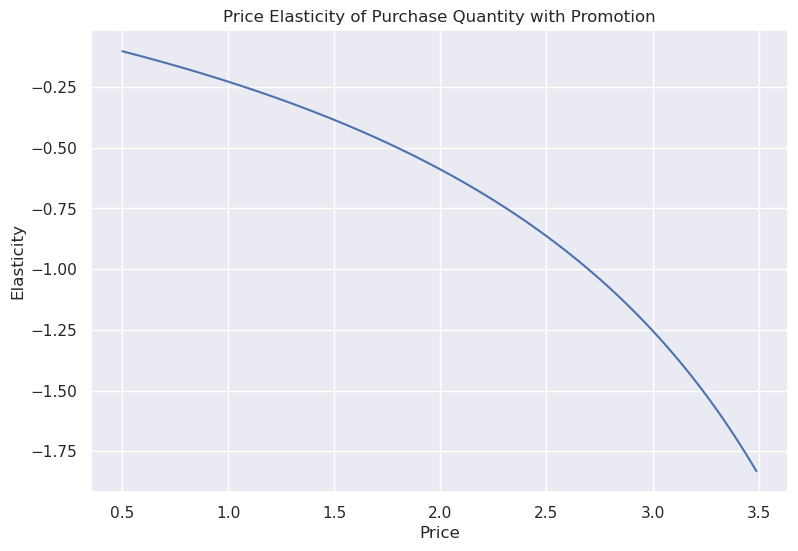

In [107]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elasticity_quantity_promotion_yes)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Quantity with Promotion')

## Price Elasticity without Promotion

In [108]:
# Overwrite promotion incidence in order to use the same df. 
# Here we assume there are no promotinal activities active for the entire price range.
df_price_elasticity_quantity['Promotion_Incidence'] = 0
# Find the new predicted quantities.
predict_quantity = model_quantity.predict(df_price_elasticity_quantity)
# Calculate the new price elasticities.
price_elasticity_quantity_promotion_no = beta_quantity * price_range / predict_quantity
# Add the results to the master data frame.
df_price_elasticities['PE_Quantity_Promotion_0'] = price_elasticity_quantity_promotion_no
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_1,PE_Segment_2,PE_Segment_3,PE_Segment_4,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4,Brand 5 S0,Brand_5_Cross_Brand_4_S0,Brand 5 S1,Brand_5_Cross_Brand_4_S1,Brand 5 S2,Brand_5_Cross_Brand_4_S2,Brand 5 S3,Brand_5_Cross_Brand_4_S3,PE_Quantity_Promotion_1,PE_Quantity_Promotion_0
0,0.50,-0.096447,-0.030643,-0.211212,-0.119096,-0.168044,-0.125723,-0.195633,-0.049056,0.332012,-0.001041,0.181471,-0.115832,0.174107,-0.043940,0.194766,-0.297312,0.482421,-0.102157,-0.099543
1,0.51,-0.100517,-0.032391,-0.217783,-0.123279,-0.172968,-0.129838,-0.201753,-0.050617,0.337288,-0.001103,0.183766,-0.118871,0.176163,-0.045027,0.197250,-0.303358,0.491726,-0.104413,-0.101736
2,0.52,-0.104715,-0.034225,-0.224461,-0.127555,-0.177963,-0.134032,-0.207976,-0.052207,0.342507,-0.001168,0.186013,-0.121945,0.178167,-0.046123,0.199683,-0.309414,0.501015,-0.106679,-0.103939
3,0.53,-0.109042,-0.036148,-0.231249,-0.131926,-0.183028,-0.138307,-0.214302,-0.053827,0.347669,-0.001236,0.188211,-0.125054,0.180121,-0.047229,0.202065,-0.315481,0.510289,-0.108954,-0.106150
4,0.54,-0.113503,-0.038165,-0.238145,-0.136393,-0.188164,-0.142662,-0.220732,-0.055478,0.352773,-0.001308,0.190360,-0.128199,0.182024,-0.048343,0.204397,-0.321559,0.519548,-0.111238,-0.108369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,3.45,-8.013910,-12.508085,-5.051336,-5.679424,-4.020609,-4.860373,-4.982054,-3.231573,0.162234,-3.746073,0.023468,-3.592454,0.024055,-1.287420,0.068595,-3.337316,0.157472,-1.774292,-1.664290
296,3.46,-8.039161,-12.544921,-5.068190,-5.699578,-4.035472,-4.878572,-4.998957,-3.247767,0.160334,-3.757516,0.023008,-3.606359,0.023698,-1.297228,0.067972,-3.350646,0.152051,-1.788634,-1.677205
297,3.47,-8.064377,-12.581740,-5.085026,-5.719695,-4.050318,-4.896741,-5.015841,-3.263929,0.158448,-3.768938,0.022555,-3.620219,0.023347,-1.307092,0.067353,-3.363974,0.146794,-1.803124,-1.690246
298,3.48,-8.089560,-12.618542,-5.101844,-5.739775,-4.065149,-4.914879,-5.032704,-3.280058,0.156576,-3.780340,0.022109,-3.634035,0.022999,-1.317012,0.066739,-3.377298,0.141700,-1.817766,-1.703414


Text(0.5, 1.0, 'Price Elasticity of Purchase Quantity with Promotion')

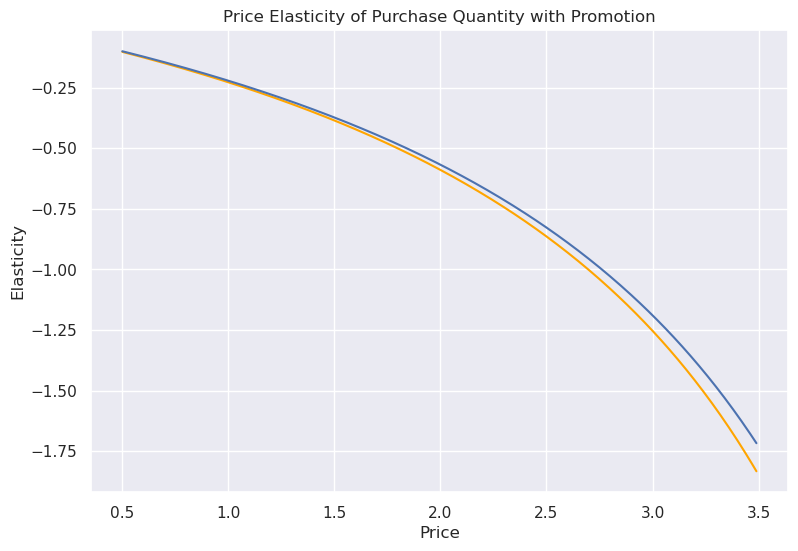

In [109]:
# Plot the two elasticities side by side. 
plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elasticity_quantity_promotion_yes, color = 'orange')
plt.plot(price_range, price_elasticity_quantity_promotion_no)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Quantity with Promotion')